# Trying out Classical Machine Learning methods to analyze the data

In this notebook. We visualize the different model performances. The models included are random forests, k-means clustering and baseline models

In [1]:
import os
import sys
import sklearn
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

opj = os.path.join

8 different preliminary data sets are imported. This .csv files contain the different punch types.

In [2]:
# Import the data.
cross = pd.read_csv("Data/Preprocessed Data/transformed_cross.csv", sep=",")
jab = pd.read_csv("Data/Preprocessed Data/transformed_jab.csv", sep=",")
lft_nopunch = pd.read_csv("Data/Preprocessed Data/transformed_lft_nopunch.csv", sep=",")
lh = pd.read_csv("Data/Preprocessed Data/transformed_lh.csv", sep=",")
lu = pd.read_csv("Data/Preprocessed Data/transformed_lu.csv", sep=",")
rght_nopunch = pd.read_csv("Data/Preprocessed Data/transformed_rght_nopunch.csv", sep=",")
rh = pd.read_csv("Data/Preprocessed Data/transformed_rh.csv", sep = ",")
ru = pd.read_csv("Data/Preprocessed Data/transformed_ru.csv", sep = ",") 

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Preprocessed Data/transformed_cross.csv'

In [ ]:
dfs = [cross, jab, lft_nopunch, lh, lu, rght_nopunch, rh, ru]
df_punching = pd.concat(dfs, ignore_index = True)
print(np.shape(df_punching))

(2052, 8)


In [ ]:
mean_x = []
mean_y = []
mean_z = []
std_x = []
std_y = []
std_z = []
for df in dfs:
    mean_x.append(np.mean(df["X (m/s^2)"]))
    mean_y.append(np.mean(df["Y (m/s^2)"]))
    mean_z.append(np.mean(df["Z (m/s^2)"]))
    
    std_x.append(np.std(df["X (m/s^2)"]))
    std_y.append(np.std(df["Y (m/s^2)"]))
    std_z.append(np.std(df["Z (m/s^2)"]))

print(mean_x)
print(mean_y)
print(mean_z)

print(std_x)
print(std_y)
print(std_z)

[10.7462880794702, 9.0016059602649, 8.253933333333332, 13.399754966887418, 6.9975, 7.365608333333333, 18.569029801324504, 7.065897350993377]
[12.964622516556291, 11.265658940397351, 5.1141, 9.148586092715233, 10.104079470198675, 5.419225, 13.007394039735102, 12.761400662251654]
[5.375271523178808, 6.1075860927152315, 1.771875, 8.409072847682118, 14.624811258278143, 3.6738750000000002, 8.782211920529802, 18.992271523178808]
[2.3007999803243546, 2.098360015661925, 0.4780170626894214, 4.239533146962904, 1.5359042976661677, 0.7604847609237296, 8.320659194214375, 2.5769605086172964]
[5.558324134901821, 6.154472502794359, 0.6816157201825674, 4.227105228575339, 4.411668433205901, 0.9776028715050913, 7.044922006183568, 6.034994846977578]
[2.1084990375088686, 2.2238373487839262, 0.7223521943680473, 4.2962139170650335, 6.383054131098647, 0.7535496949162234, 5.562805724149111, 8.846297474783892]


In [ ]:
# Split the data.
X = df_punching.drop(["Punch Type"], axis=1)
y = df_punching["Punch Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
# Train the model.
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Validate the model performance.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=False)

print(f"Accuracy: {accuracy}")
print(f"classification_report: {report}")

Accuracy: 0.8928571428571429
classification_report:               precision    recall  f1-score   support

       cross       0.89      0.90      0.90        91
         jab       0.89      0.84      0.86        97
 lft_nopunch       1.00      1.00      1.00        40
          lh       0.93      0.88      0.90        99
          lu       0.83      0.92      0.87        75
rght_nopunch       0.82      0.94      0.88        35
          rh       0.86      0.92      0.89        83
          ru       0.93      0.85      0.89        96

    accuracy                           0.89       616
   macro avg       0.89      0.91      0.90       616
weighted avg       0.90      0.89      0.89       616



In [ ]:
baseline_model = DummyClassifier(strategy="uniform", random_state=42)
baseline_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [ ]:
y_pred_baseline = baseline_model.predict(X_test)

In [ ]:
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline accuracy: {accuracy_baseline}")
print(report_baseline)

Baseline accuracy: 0.1590909090909091
              precision    recall  f1-score   support

       cross       0.18      0.16      0.17        91
         jab       0.18      0.12      0.15        97
 lft_nopunch       0.05      0.10      0.07        40
          lh       0.14      0.13      0.14        99
          lu       0.16      0.13      0.15        75
rght_nopunch       0.08      0.17      0.11        35
          rh       0.21      0.19      0.20        83
          ru       0.25      0.23      0.24        96

    accuracy                           0.16       616
   macro avg       0.16      0.16      0.15       616
weighted avg       0.17      0.16      0.16       616



In [ ]:
# For some reason this is not working on my system. No idea why, function just doesn't like to be imported.
# from utils import *
# random_forest_classifier(n_estimators=1000, print_results=True)

In [ ]:
metrics_baseline = get_metrics_from_report(report_baseline, class_name="jab")

print(metrics_baseline)

(0.14, 0.1, 0.12, 0.11)


## Analyzing the experimental data

We've tested the model on the preliminary data, it showed remarkable accuracy. However, due to the way the data has been collected. We suspect that autocorrelation might have resulted in the model overfitting.

In [6]:
# Import the 50 Hz and 100 Hz data
exp_data_dir = "Data/Preprocessed Data/"

window_50_df = pd.read_csv(os.path.join(exp_data_dir, "clean_data_window50.csv"), sep=",")
window_100_df = pd.read_csv(os.path.join(exp_data_dir, 'clean_data_window100.csv'), sep=",")


## 1 Data Inspection

In [7]:
# Inspect the data
window_50_df.head

<bound method NDFrame.head of       Unnamed: 0  X (rad/s)  Y (rad/s)  Z (rad/s)  X (m/s^2)  Y (m/s^2)  \
0              0      0.940      2.556      4.737     18.410     18.712   
1              1      1.309      1.250      2.045      2.015      2.789   
2              2      0.731      0.976      1.708      4.684      4.073   
3              3      0.700      2.188      1.335      3.443      4.564   
4              4      1.202      1.424      0.666      1.988      1.778   
...          ...        ...        ...        ...        ...        ...   
7480        7480      1.028      1.465      0.951      1.852      4.492   
7481        7481      0.129      0.180      0.047      0.205      0.168   
7482        7482      1.330      1.413      1.879      4.693      3.545   
7483        7483      0.220      0.165      0.172      0.250      0.735   
7484        7484      2.858      3.637      2.594      5.015     10.997   

      Z (m/s^2)     Punch Type  
0         9.713      righthook  
1  

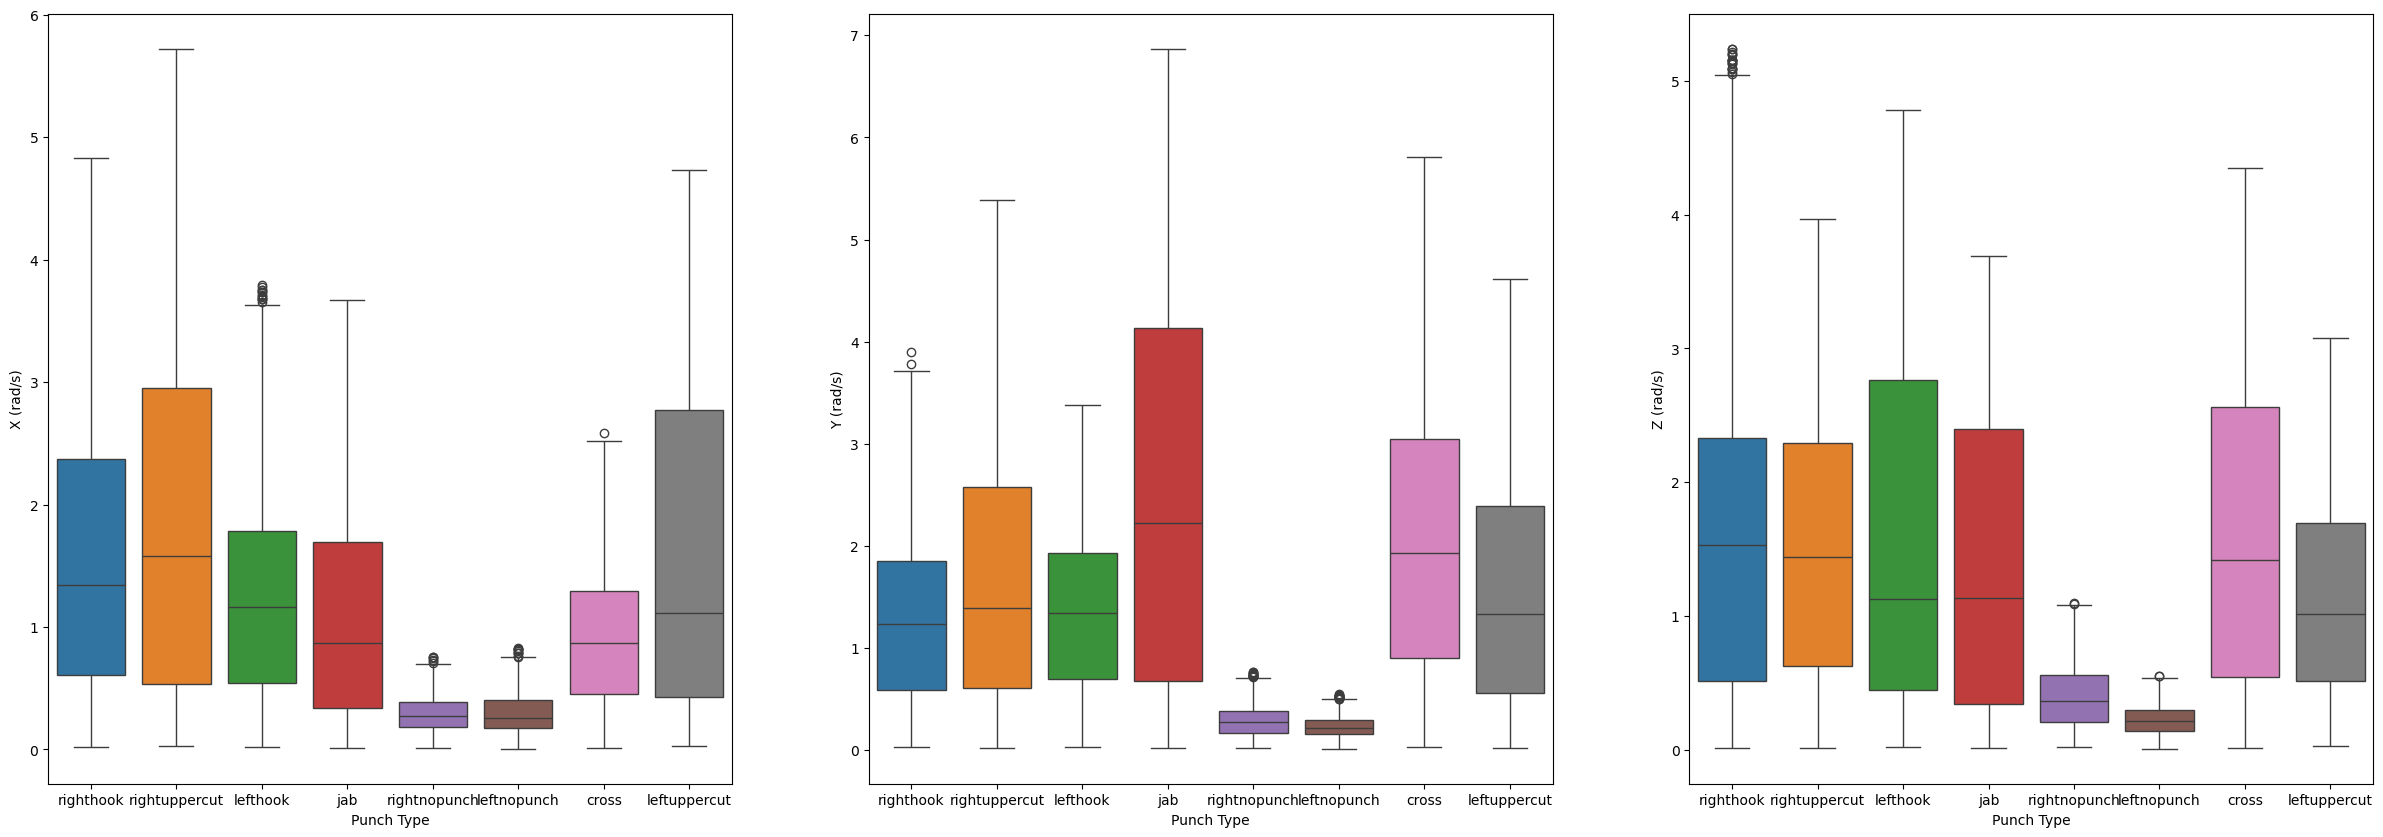

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the distirbutions in gyroscope
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

values = ("X (rad/s)", "Y (rad/s)", "Z (rad/s)")

for ax, col in zip(axes, values):
    sns.boxplot(x=window_50_df["Punch Type"], y=window_50_df[col], hue=window_50_df["Punch Type"], ax=ax)

plt.show()

## 2 Trying out the 50 Hz window Frame

In [37]:
X = window_50_df.drop(["Punch Type"], axis=1)
y = window_50_df["Punch Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [38]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [41]:
baseline_model = DummyClassifier(strategy="uniform", random_state=42)
baseline_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [42]:
y_pred = model.predict(X_test)
y_pred_baseline = baseline_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=False)

print(f"Accuracy: {accuracy}")
print(f"classification report: {report}")

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline accuracy: {accuracy_baseline}")
print(report_baseline)

Accuracy: 0.7030276046304541
classification report:                precision    recall  f1-score   support

        cross       0.75      0.67      0.71       332
          jab       0.71      0.74      0.72       348
     lefthook       0.68      0.65      0.66       292
  leftnopunch       0.72      0.82      0.77       229
 leftuppercut       0.62      0.68      0.65       241
    righthook       0.64      0.60      0.62       278
 rightnopunch       0.75      0.86      0.80       241
rightuppercut       0.76      0.64      0.69       285

     accuracy                           0.70      2246
    macro avg       0.70      0.71      0.70      2246
 weighted avg       0.70      0.70      0.70      2246

Baseline accuracy: 0.13134461264470168
               precision    recall  f1-score   support

        cross       0.14      0.13      0.14       332
          jab       0.14      0.11      0.12       348
     lefthook       0.13      0.12      0.12       292
  leftnopunch       0.12 

## 3 Evaluating the 100Hz Model

In [44]:
X = window_100_df.drop(["Punch Type"], axis=1)
y = window_100_df["Punch Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [45]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [46]:
baseline_model = DummyClassifier(strategy="uniform", random_state=42)
baseline_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [47]:
y_pred = model.predict(X_test)
y_pred_baseline = baseline_model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=False)

print(f"Accuracy: {accuracy}")
print(f"classification report: {report}")

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline accuracy: {accuracy_baseline}")
print(report_baseline)

Accuracy: 0.8426349496797805
classification report:                precision    recall  f1-score   support

        cross       0.94      0.96      0.95       153
          jab       0.94      0.95      0.95       138
     lefthook       0.86      0.78      0.82       165
  leftnopunch       0.71      0.92      0.80       114
 leftuppercut       0.76      0.73      0.75       125
    righthook       0.87      0.66      0.75       142
 rightnopunch       0.82      0.88      0.85       127
rightuppercut       0.82      0.88      0.85       129

     accuracy                           0.84      1093
    macro avg       0.84      0.84      0.84      1093
 weighted avg       0.85      0.84      0.84      1093

Baseline accuracy: 0.1262580054894785
               precision    recall  f1-score   support

        cross       0.15      0.15      0.15       153
          jab       0.16      0.14      0.15       138
     lefthook       0.12      0.09      0.10       165
  leftnopunch       0.13  